<a href="https://colab.research.google.com/github/TejaswiniKarpe/Global-Temperature-Analysis-Prediction/blob/main/Copy_of_DAProject117%2C118%2C119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DATA ANALYTICS PROJECT**

##### MIS: 111910117, 111910118, 111910119

###The analysis of global historical temperature data and the prediction of global warming trends using a dataset with 60 years of global temperature data.

#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Load CSV File

In [ ]:
# Reading the dataset

temp_change=pd.read_csv('https://drive.google.com/uc?export=download&id=1BDJPwR1rsMClWy_MzbibLtGYOn60OHg0',encoding="latin-1")
temp_change.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,0.389,-2.298,0.804,-1.487,-1.305,-2.951,-1.184,-0.490,2.409,-3.014,-0.663,1.141,-0.393,1.724,0.678,0.524,-0.058,0.435,0.332,2.655,1.150,-1.108,0.634,0.018,0.582,-0.821,1.087,1.297,-0.718,1.426,0.950,0.859,1.565,-0.603,1.606,2.479,2.707,0.109,-1.606,0.431,-5.553,1.518,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,-2.055,-3.167,1.809,0.816,-7.722,1.838,-3.706,-1.239,-1.620,-0.156,-0.369,1.072,-1.222,1.088,-2.101,0.460,-4.321,2.467,-0.286,1.409,0.170,-2.890,-0.310,-1.373,-0.120,1.414,-1.412,-0.149,0.870,0.043,-0.540,3.222,-0.901,0.707,0.985,1.816,2.871,-1.506,4.725,1.645,-2.332,2.494,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,0.496,2.481,-0.915,1.658,-1.784,-0.473,1.001,-0.585,-2.817,3.377,-1.536,-1.420,-0.628,1.166,-1.781,-2.406,1.761,-0.160,-3.087,1.330,-0.056,0.065,-1.000,-0.901,-2.220,-1.449,1.312,-1.451,-0.336,-0.005,-0.576,-0.217,-0.267,1.229,1.949,-0.158,2.753,1.663,1.847,-0.201,4.172,2.362,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


In [ ]:
temp_change.tail(6)

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
9650,5873,OECD,7018,JunJulAug,7271,Temperature change,°C,0.101,0.052,-0.047,-0.114,-0.495,-0.015,-0.184,-0.437,0.022,0.240,-0.073,-0.191,0.515,-0.086,0.273,-0.160,0.075,-0.265,0.101,0.334,0.316,-0.177,0.421,0.184,-0.053,-0.076,0.177,0.750,0.319,0.431,0.641,-0.211,0.177,0.645,0.612,0.626,0.454,1.065,0.619,0.372,0.812,0.768,1.040,0.304,0.861,1.011,0.766,0.598,0.677,1.012,0.954,1.061,1.119,0.779,0.958,1.303,1.081,1.078,1.078
9651,5873,OECD,7018,JunJulAug,6078,Standard Deviation,°C,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247
9652,5873,OECD,7019,SepOctNov,7271,Temperature change,°C,0.036,0.461,0.665,-0.157,-0.203,-0.295,0.321,0.220,-0.027,-0.146,-0.004,-0.636,0.132,-0.544,-0.124,-0.537,0.374,-0.441,0.525,0.317,0.575,-0.101,0.673,-0.290,-0.528,-0.502,0.672,0.284,0.012,0.209,0.043,-0.385,-0.388,0.623,0.285,-0.202,0.576,1.285,0.834,0.539,0.831,0.735,0.904,0.748,1.230,0.972,0.909,0.785,1.093,0.958,1.106,0.885,1.041,0.999,1.670,1.535,1.194,0.581,1.233
9653,5873,OECD,7019,SepOctNov,6078,Standard Deviation,°C,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378
9654,5873,OECD,7020,Meteorological year,7271,Temperature change,°C,0.165,-0.009,0.134,-0.190,-0.385,-0.166,-0.090,0.013,-0.068,0.061,-0.155,-0.527,0.292,-0.274,0.046,-0.193,0.448,-0.136,-0.086,0.546,0.787,-0.174,0.497,0.002,-0.066,0.246,0.639,0.739,0.327,0.509,0.486,0.257,0.229,0.487,0.690,0.110,0.433,1.437,1.008,0.866,0.891,0.774,0.987,0.689,1.116,1.291,1.113,0.647,0.715,1.246,0.805,1.274,0.991,0.811,1.282,1.850,1.349,1.088,1.297
9655,5873,OECD,7020,Meteorological year,6078,Standard Deviation,°C,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260,0.260


#Data Cleaning

In [ ]:
# Considering only temperature change elements, and removing Standard Deviation

temp=temp_change[temp_change["Element"].str.contains("Standard Deviation")==False]
temp.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,0.389,-2.298,0.804,-1.487,-1.305,-2.951,-1.184,-0.490,2.409,-3.014,-0.663,1.141,-0.393,1.724,0.678,0.524,-0.058,0.435,0.332,2.655,1.150,-1.108,0.634,0.018,0.582,-0.821,1.087,1.297,-0.718,1.426,0.950,0.859,1.565,-0.603,1.606,2.479,2.707,0.109,-1.606,0.431,-5.553,1.518,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,-2.055,-3.167,1.809,0.816,-7.722,1.838,-3.706,-1.239,-1.620,-0.156,-0.369,1.072,-1.222,1.088,-2.101,0.460,-4.321,2.467,-0.286,1.409,0.170,-2.890,-0.310,-1.373,-0.120,1.414,-1.412,-0.149,0.870,0.043,-0.540,3.222,-0.901,0.707,0.985,1.816,2.871,-1.506,4.725,1.645,-2.332,2.494,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,0.496,2.481,-0.915,1.658,-1.784,-0.473,1.001,-0.585,-2.817,3.377,-1.536,-1.420,-0.628,1.166,-1.781,-2.406,1.761,-0.160,-3.087,1.330,-0.056,0.065,-1.000,-0.901,-2.220,-1.449,1.312,-1.451,-0.336,-0.005,-0.576,-0.217,-0.267,1.229,1.949,-0.158,2.753,1.663,1.847,-0.201,4.172,2.362,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
6,2,Afghanistan,7004,April,7271,Temperature change,°C,-1.709,0.117,0.919,-0.533,-1.816,-1.192,-1.496,-0.590,-0.770,1.439,1.534,-0.602,1.106,1.051,-0.710,-0.690,1.070,1.484,1.714,2.750,0.990,0.461,-1.410,0.613,0.810,-0.249,-0.342,1.316,-1.204,-0.292,-0.364,-1.210,0.438,-1.334,-0.578,-0.214,-0.420,1.486,0.215,3.504,2.774,0.958,0.562,1.086,-0.060,1.217,3.027,1.359,-1.459,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899
8,2,Afghanistan,7005,May,7271,Temperature change,°C,1.412,-0.092,-0.690,-0.160,-0.190,-0.192,-1.307,-1.841,-0.977,1.864,2.045,-1.051,0.724,0.185,0.470,0.634,0.532,1.085,-2.530,1.842,1.141,0.062,1.078,1.240,0.181,0.819,-0.254,1.569,-1.156,1.776,-0.819,-2.361,0.609,1.002,0.153,-0.723,-0.835,0.429,0.986,4.050,4.103,1.300,-0.857,1.585,-0.981,4.064,1.428,3.032,1.623,1.419,3.643,0.909,1.201,0.959,1.862,3.246,3.280,0.855,0.647


In [ ]:
temp.shape

(4828, 66)

In [ ]:
# Renaming columns for clarity

temp.columns = temp.columns.str.lower()
temp.columns = temp.columns.str.replace("y","")
temp.head()

,area code,area,months code,months,element code,element,unit,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,0.389,-2.298,0.804,-1.487,-1.305,-2.951,-1.184,-0.490,2.409,-3.014,-0.663,1.141,-0.393,1.724,0.678,0.524,-0.058,0.435,0.332,2.655,1.150,-1.108,0.634,0.018,0.582,-0.821,1.087,1.297,-0.718,1.426,0.950,0.859,1.565,-0.603,1.606,2.479,2.707,0.109,-1.606,0.431,-5.553,1.518,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,-2.055,-3.167,1.809,0.816,-7.722,1.838,-3.706,-1.239,-1.620,-0.156,-0.369,1.072,-1.222,1.088,-2.101,0.460,-4.321,2.467,-0.286,1.409,0.170,-2.890,-0.310,-1.373,-0.120,1.414,-1.412,-0.149,0.870,0.043,-0.540,3.222,-0.901,0.707,0.985,1.816,2.871,-1.506,4.725,1.645,-2.332,2.494,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,0.496,2.481,-0.915,1.658,-1.784,-0.473,1.001,-0.585,-2.817,3.377,-1.536,-1.420,-0.628,1.166,-1.781,-2.406,1.761,-0.160,-3.087,1.330,-0.056,0.065,-1.000,-0.901,-2.220,-1.449,1.312,-1.451,-0.336,-0.005,-0.576,-0.217,-0.267,1.229,1.949,-0.158,2.753,1.663,1.847,-0.201,4.172,2.362,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
6,2,Afghanistan,7004,April,7271,Temperature change,°C,-1.709,0.117,0.919,-0.533,-1.816,-1.192,-1.496,-0.590,-0.770,1.439,1.534,-0.602,1.106,1.051,-0.710,-0.690,1.070,1.484,1.714,2.750,0.990,0.461,-1.410,0.613,0.810,-0.249,-0.342,1.316,-1.204,-0.292,-0.364,-1.210,0.438,-1.334,-0.578,-0.214,-0.420,1.486,0.215,3.504,2.774,0.958,0.562,1.086,-0.060,1.217,3.027,1.359,-1.459,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899
8,2,Afghanistan,7005,May,7271,Temperature change,°C,1.412,-0.092,-0.690,-0.160,-0.190,-0.192,-1.307,-1.841,-0.977,1.864,2.045,-1.051,0.724,0.185,0.470,0.634,0.532,1.085,-2.530,1.842,1.141,0.062,1.078,1.240,0.181,0.819,-0.254,1.569,-1.156,1.776,-0.819,-2.361,0.609,1.002,0.153,-0.723,-0.835,0.429,0.986,4.050,4.103,1.300,-0.857,1.585,-0.981,4.064,1.428,3.032,1.623,1.419,3.643,0.909,1.201,0.959,1.862,3.246,3.280,0.855,0.647


In [ ]:
# Dropping unnecessary columns

temp1=temp.drop(columns=['area code','element code','months code','unit'],inplace=False) #inplace makes a copy and assigns to temp1
temp1.head(4)

,area,months,element,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,January,Temperature change,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,0.389,-2.298,0.804,-1.487,-1.305,-2.951,-1.184,-0.490,2.409,-3.014,-0.663,1.141,-0.393,1.724,0.678,0.524,-0.058,0.435,0.332,2.655,1.150,-1.108,0.634,0.018,0.582,-0.821,1.087,1.297,-0.718,1.426,0.950,0.859,1.565,-0.603,1.606,2.479,2.707,0.109,-1.606,0.431,-5.553,1.518,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
2,Afghanistan,February,Temperature change,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,-2.055,-3.167,1.809,0.816,-7.722,1.838,-3.706,-1.239,-1.620,-0.156,-0.369,1.072,-1.222,1.088,-2.101,0.460,-4.321,2.467,-0.286,1.409,0.170,-2.890,-0.310,-1.373,-0.120,1.414,-1.412,-0.149,0.870,0.043,-0.540,3.222,-0.901,0.707,0.985,1.816,2.871,-1.506,4.725,1.645,-2.332,2.494,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
4,Afghanistan,March,Temperature change,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,0.496,2.481,-0.915,1.658,-1.784,-0.473,1.001,-0.585,-2.817,3.377,-1.536,-1.420,-0.628,1.166,-1.781,-2.406,1.761,-0.160,-3.087,1.330,-0.056,0.065,-1.000,-0.901,-2.220,-1.449,1.312,-1.451,-0.336,-0.005,-0.576,-0.217,-0.267,1.229,1.949,-0.158,2.753,1.663,1.847,-0.201,4.172,2.362,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
6,Afghanistan,April,Temperature change,-1.709,0.117,0.919,-0.533,-1.816,-1.192,-1.496,-0.590,-0.770,1.439,1.534,-0.602,1.106,1.051,-0.710,-0.690,1.070,1.484,1.714,2.750,0.990,0.461,-1.410,0.613,0.810,-0.249,-0.342,1.316,-1.204,-0.292,-0.364,-1.210,0.438,-1.334,-0.578,-0.214,-0.420,1.486,0.215,3.504,2.774,0.958,0.562,1.086,-0.060,1.217,3.027,1.359,-1.459,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899


In [ ]:
#Replace index without letting old index become a column

temp2=temp1.reset_index(drop=True)
temp2.head()

,area,months,element,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,January,Temperature change,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,0.389,-2.298,0.804,-1.487,-1.305,-2.951,-1.184,-0.490,2.409,-3.014,-0.663,1.141,-0.393,1.724,0.678,0.524,-0.058,0.435,0.332,2.655,1.150,-1.108,0.634,0.018,0.582,-0.821,1.087,1.297,-0.718,1.426,0.950,0.859,1.565,-0.603,1.606,2.479,2.707,0.109,-1.606,0.431,-5.553,1.518,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,Afghanistan,February,Temperature change,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,-2.055,-3.167,1.809,0.816,-7.722,1.838,-3.706,-1.239,-1.620,-0.156,-0.369,1.072,-1.222,1.088,-2.101,0.460,-4.321,2.467,-0.286,1.409,0.170,-2.890,-0.310,-1.373,-0.120,1.414,-1.412,-0.149,0.870,0.043,-0.540,3.222,-0.901,0.707,0.985,1.816,2.871,-1.506,4.725,1.645,-2.332,2.494,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
2,Afghanistan,March,Temperature change,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,0.496,2.481,-0.915,1.658,-1.784,-0.473,1.001,-0.585,-2.817,3.377,-1.536,-1.420,-0.628,1.166,-1.781,-2.406,1.761,-0.160,-3.087,1.330,-0.056,0.065,-1.000,-0.901,-2.220,-1.449,1.312,-1.451,-0.336,-0.005,-0.576,-0.217,-0.267,1.229,1.949,-0.158,2.753,1.663,1.847,-0.201,4.172,2.362,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
3,Afghanistan,April,Temperature change,-1.709,0.117,0.919,-0.533,-1.816,-1.192,-1.496,-0.590,-0.770,1.439,1.534,-0.602,1.106,1.051,-0.710,-0.690,1.070,1.484,1.714,2.750,0.990,0.461,-1.410,0.613,0.810,-0.249,-0.342,1.316,-1.204,-0.292,-0.364,-1.210,0.438,-1.334,-0.578,-0.214,-0.420,1.486,0.215,3.504,2.774,0.958,0.562,1.086,-0.060,1.217,3.027,1.359,-1.459,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899
4,Afghanistan,May,Temperature change,1.412,-0.092,-0.690,-0.160,-0.190,-0.192,-1.307,-1.841,-0.977,1.864,2.045,-1.051,0.724,0.185,0.470,0.634,0.532,1.085,-2.530,1.842,1.141,0.062,1.078,1.240,0.181,0.819,-0.254,1.569,-1.156,1.776,-0.819,-2.361,0.609,1.002,0.153,-0.723,-0.835,0.429,0.986,4.050,4.103,1.300,-0.857,1.585,-0.981,4.064,1.428,3.032,1.623,1.419,3.643,0.909,1.201,0.959,1.862,3.246,3.280,0.855,0.647


In [ ]:
# Finding null value counts

temp2.isnull().sum()

area         0
months       0
element      0
1961       676
1962       667
          ... 
2015       334
2016       344
2017       332
2018       342
2019       342
Length: 62, dtype: int64

In [ ]:
# Finding null value percentages

null_var=temp2.isnull().sum()/temp2.shape[0]*100
null_var

area        0.000000
months      0.000000
element     0.000000
1961       14.001657
1962       13.815244
             ...    
2015        6.917978
2016        7.125104
2017        6.876553
2018        7.083679
2019        7.083679
Length: 62, dtype: float64

In [ ]:
# Dropping null values

temp_change1=temp2.dropna()
print(temp_change1.isnull().sum())
print(temp_change1.shape)

area       0
months     0
element    0
1961       0
1962       0
          ..
2015       0
2016       0
2017       0
2018       0
2019       0
Length: 62, dtype: int64
(3380, 62)


In [ ]:
# Dropping and Renaming Columns

temp3=temp_change1.drop(columns=["element"])
temp4=temp3.rename(columns={"area":"country"})
temp4.head()

,country,months,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,January,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,0.389,-2.298,0.804,-1.487,-1.305,-2.951,-1.184,-0.490,2.409,-3.014,-0.663,1.141,-0.393,1.724,0.678,0.524,-0.058,0.435,0.332,2.655,1.150,-1.108,0.634,0.018,0.582,-0.821,1.087,1.297,-0.718,1.426,0.950,0.859,1.565,-0.603,1.606,2.479,2.707,0.109,-1.606,0.431,-5.553,1.518,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,Afghanistan,February,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,-2.055,-3.167,1.809,0.816,-7.722,1.838,-3.706,-1.239,-1.620,-0.156,-0.369,1.072,-1.222,1.088,-2.101,0.460,-4.321,2.467,-0.286,1.409,0.170,-2.890,-0.310,-1.373,-0.120,1.414,-1.412,-0.149,0.870,0.043,-0.540,3.222,-0.901,0.707,0.985,1.816,2.871,-1.506,4.725,1.645,-2.332,2.494,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
2,Afghanistan,March,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,0.496,2.481,-0.915,1.658,-1.784,-0.473,1.001,-0.585,-2.817,3.377,-1.536,-1.420,-0.628,1.166,-1.781,-2.406,1.761,-0.160,-3.087,1.330,-0.056,0.065,-1.000,-0.901,-2.220,-1.449,1.312,-1.451,-0.336,-0.005,-0.576,-0.217,-0.267,1.229,1.949,-0.158,2.753,1.663,1.847,-0.201,4.172,2.362,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
3,Afghanistan,April,-1.709,0.117,0.919,-0.533,-1.816,-1.192,-1.496,-0.590,-0.770,1.439,1.534,-0.602,1.106,1.051,-0.710,-0.690,1.070,1.484,1.714,2.750,0.990,0.461,-1.410,0.613,0.810,-0.249,-0.342,1.316,-1.204,-0.292,-0.364,-1.210,0.438,-1.334,-0.578,-0.214,-0.420,1.486,0.215,3.504,2.774,0.958,0.562,1.086,-0.060,1.217,3.027,1.359,-1.459,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899
4,Afghanistan,May,1.412,-0.092,-0.690,-0.160,-0.190,-0.192,-1.307,-1.841,-0.977,1.864,2.045,-1.051,0.724,0.185,0.470,0.634,0.532,1.085,-2.530,1.842,1.141,0.062,1.078,1.240,0.181,0.819,-0.254,1.569,-1.156,1.776,-0.819,-2.361,0.609,1.002,0.153,-0.723,-0.835,0.429,0.986,4.050,4.103,1.300,-0.857,1.585,-0.981,4.064,1.428,3.032,1.623,1.419,3.643,0.909,1.201,0.959,1.862,3.246,3.280,0.855,0.647


In [ ]:
# Understanding extent of country data

print(temp4['country'].unique())
print(temp4['country'].nunique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antarctica' 'Argentina' 'Australia' 'Austria' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Botswana' 'Brazil' 'British Virgin Islands' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Channel Islands' 'Chile' 'China'
 'China, Hong Kong SAR' 'China, Macao SAR' 'China, mainland'
 'China, Taiwan Province of' 'Cocos (Keeling) Islands' 'Colombia' 'Congo'
 "Côte d'Ivoire" 'Cuba' 'Cyprus' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eswatini' 'Faroe Islands' 'Fiji' 'Finland' 'France' 'French Guiana'
 'French Polynesia' 'French Southern and Antarctic Territories' 'Gabon'
 'Gambia' 'Germany' 'Ghana' 'Gibraltar' 'Greece' 'Greenland' 'Grenada'
 'Guadeloupe' 'Guatemala' 'Guinea' 'Guinea-Biss

In [ ]:
print(temp4['months'].unique())

['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December' 'Dec\x96Jan\x96Feb'
 'Mar\x96Apr\x96May' 'Jun\x96Jul\x96Aug' 'Sep\x96Oct\x96Nov'
 'Meteorological year']


In [ ]:
# Replacing vaguely classified data

seasons_replace = {'Dec\x96Jan\x96Feb': 'Winter', 'Mar\x96Apr\x96May': 'Spring', 'Jun\x96Jul\x96Aug': 'Summer', 'Sep\x96Oct\x96Nov': 'Fall', }
temp5=temp4.replace(seasons_replace)
temp5.tail()

,country,months,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
4823,OECD,Winter,0.561,-0.362,-0.222,0.098,-0.732,-0.274,-0.165,-0.018,-0.188,0.400,-0.313,-0.969,-0.006,-0.201,0.240,-0.095,0.601,0.038,-1.067,0.876,1.224,-0.196,0.971,-0.097,-0.166,0.810,1.217,0.909,0.469,0.269,0.363,0.997,0.230,-0.097,1.477,0.004,0.666,1.885,1.439,1.444,1.042,1.351,1.281,0.974,1.031,1.896,1.693,0.741,0.567,1.272,0.770,1.709,1.327,0.686,1.307,2.636,1.884,1.453,1.527
4824,OECD,Spring,-0.038,-0.189,0.141,-0.590,-0.110,-0.078,-0.334,0.285,-0.080,-0.249,-0.233,-0.312,0.531,-0.266,-0.205,0.021,0.743,0.124,0.098,0.656,1.032,-0.222,-0.077,0.211,0.484,0.750,0.493,1.013,0.506,1.127,0.896,0.625,0.898,0.774,0.385,0.012,0.037,1.513,1.138,1.108,0.882,0.242,0.724,0.732,1.342,1.285,1.084,0.462,0.521,1.742,0.390,1.442,0.475,0.778,1.191,1.928,1.237,1.241,1.352
4825,OECD,Summer,0.101,0.052,-0.047,-0.114,-0.495,-0.015,-0.184,-0.437,0.022,0.240,-0.073,-0.191,0.515,-0.086,0.273,-0.160,0.075,-0.265,0.101,0.334,0.316,-0.177,0.421,0.184,-0.053,-0.076,0.177,0.750,0.319,0.431,0.641,-0.211,0.177,0.645,0.612,0.626,0.454,1.065,0.619,0.372,0.812,0.768,1.040,0.304,0.861,1.011,0.766,0.598,0.677,1.012,0.954,1.061,1.119,0.779,0.958,1.303,1.081,1.078,1.078
4826,OECD,Fall,0.036,0.461,0.665,-0.157,-0.203,-0.295,0.321,0.220,-0.027,-0.146,-0.004,-0.636,0.132,-0.544,-0.124,-0.537,0.374,-0.441,0.525,0.317,0.575,-0.101,0.673,-0.290,-0.528,-0.502,0.672,0.284,0.012,0.209,0.043,-0.385,-0.388,0.623,0.285,-0.202,0.576,1.285,0.834,0.539,0.831,0.735,0.904,0.748,1.230,0.972,0.909,0.785,1.093,0.958,1.106,0.885,1.041,0.999,1.670,1.535,1.194,0.581,1.233
4827,OECD,Meteorological year,0.165,-0.009,0.134,-0.190,-0.385,-0.166,-0.090,0.013,-0.068,0.061,-0.155,-0.527,0.292,-0.274,0.046,-0.193,0.448,-0.136,-0.086,0.546,0.787,-0.174,0.497,0.002,-0.066,0.246,0.639,0.739,0.327,0.509,0.486,0.257,0.229,0.487,0.690,0.110,0.433,1.437,1.008,0.866,0.891,0.774,0.987,0.689,1.116,1.291,1.113,0.647,0.715,1.246,0.805,1.274,0.991,0.811,1.282,1.850,1.349,1.088,1.297


In [ ]:
# Printing summary of cleaned data

temp5.info

<bound method DataFrame.info of           country               months   1961  ...   2017   2018   2019
0     Afghanistan              January  0.777  ...  1.201  1.996  2.951
1     Afghanistan             February -1.743  ... -0.323  2.705  0.086
2     Afghanistan                March  0.516  ...  0.834  4.418  0.234
3     Afghanistan                April -1.709  ...  1.252  1.442  0.899
4     Afghanistan                  May  1.412  ...  3.280  0.855  0.647
...           ...                  ...    ...  ...    ...    ...    ...
4823         OECD               Winter  0.561  ...  1.884  1.453  1.527
4824         OECD               Spring -0.038  ...  1.237  1.241  1.352
4825         OECD               Summer  0.101  ...  1.081  1.078  1.078
4826         OECD                 Fall  0.036  ...  1.194  0.581  1.233
4827         OECD  Meteorological year  0.165  ...  1.349  1.088  1.297

[3380 rows x 61 columns]>

#Data Visualization

In [ ]:
# Creating a Dataset for visualizing Country specific temperature trends for India

fdata = temp5
india_data = fdata[fdata['country'] == 'India'] #create dataset for india
india_data = india_data.drop(columns=['country']) #drop the country name column, redundant
india_data.head()

,months,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1751,January,0.536,-1.289,-0.395,-0.528,0.775,0.495,-0.335,-0.646,0.089,0.332,-0.193,0.040,0.607,-0.174,-0.786,-0.157,0.043,-0.279,0.627,0.481,-0.003,0.631,-0.295,-0.195,0.459,0.067,0.539,1.120,-0.525,1.402,-0.131,-0.075,0.275,0.911,-0.761,0.579,-0.399,0.380,-0.082,0.688,0.216,0.475,-0.017,0.246,0.453,0.738,0.824,0.276,1.584,0.209,-0.435,-0.252,0.009,0.190,-0.073,1.100,0.786,0.527,0.122
1752,February,-1.413,-0.380,0.669,-0.057,-0.272,1.284,0.716,-1.117,0.417,-0.053,-0.243,-1.690,1.149,-0.398,-0.226,0.098,0.600,-0.538,-0.669,0.735,0.513,-0.447,-0.586,-1.195,0.093,-0.242,0.538,1.221,-0.348,0.137,0.657,-0.781,0.458,-0.291,0.013,0.481,-0.529,0.370,1.260,-0.650,0.999,0.562,0.895,0.468,0.599,2.533,0.510,-0.817,1.657,0.982,0.354,0.023,0.496,-0.459,0.970,1.777,1.286,1.290,0.392
1753,March,0.499,-0.569,-0.357,0.945,-0.860,-0.073,-1.115,-0.554,1.296,-0.311,-0.535,0.144,0.264,0.915,-0.225,0.174,1.380,-1.102,-0.637,-0.038,-0.438,-1.088,-0.352,0.707,1.395,0.173,0.121,0.388,-0.495,-1.051,0.458,0.197,-0.880,1.096,-0.626,1.129,0.124,-0.599,0.943,-0.397,0.354,0.849,0.183,1.866,0.747,0.045,-0.018,0.726,1.062,2.192,0.570,0.269,0.560,-0.361,-0.186,1.607,0.592,1.395,0.141
1754,April,0.026,-0.223,-0.903,0.570,-1.165,-0.019,-0.775,-0.932,0.485,0.478,-0.024,-0.493,1.473,0.677,0.550,-0.496,-0.375,-0.170,0.207,1.098,-0.057,-0.633,-1.269,0.202,0.322,0.045,0.320,0.547,-0.235,-0.216,-0.294,-0.049,-0.274,-0.671,-0.156,-0.087,-1.444,0.474,1.211,1.000,-0.253,0.868,0.866,0.923,-0.187,0.189,0.880,-0.058,0.850,1.990,-0.491,0.203,0.085,0.261,-0.505,1.670,1.198,0.654,1.034
1755,May,-0.144,-0.370,-0.558,-0.151,-0.430,0.116,-0.078,-0.539,-0.340,0.496,-1.125,0.337,0.545,-0.417,0.485,-0.329,-1.165,0.744,-0.279,0.815,-0.085,-0.966,-0.477,0.897,0.404,-0.460,-0.804,1.112,0.382,-1.074,0.419,-0.380,0.319,0.535,0.006,0.369,-0.549,1.167,-0.304,-0.099,0.224,0.846,0.598,-0.096,0.039,0.128,0.201,-0.095,0.388,1.052,0.253,0.650,0.775,-0.224,0.640,0.581,0.842,0.610,0.843


In [ ]:
# Average temperature change over the years in India

# Creating a dataframe out of the Series of mean values of every column
avg_india_data = india_data.mean().to_frame()

# Adding a column labeled "year", which mirrors the index
avg_india_data['year'] = avg_india_data.index

# Renaming mean column to temp for clarity
avg_india_data = avg_india_data.rename({0: 'temp'}, axis=1)  #axis=1 searches for a column titled 0, not rows
avg_india_data.head()


,temp,year
1961,-0.373353,1961
1962,-0.453941,1962
1963,-0.025765,1963
1964,-0.029824,1964
1965,-0.043353,1965


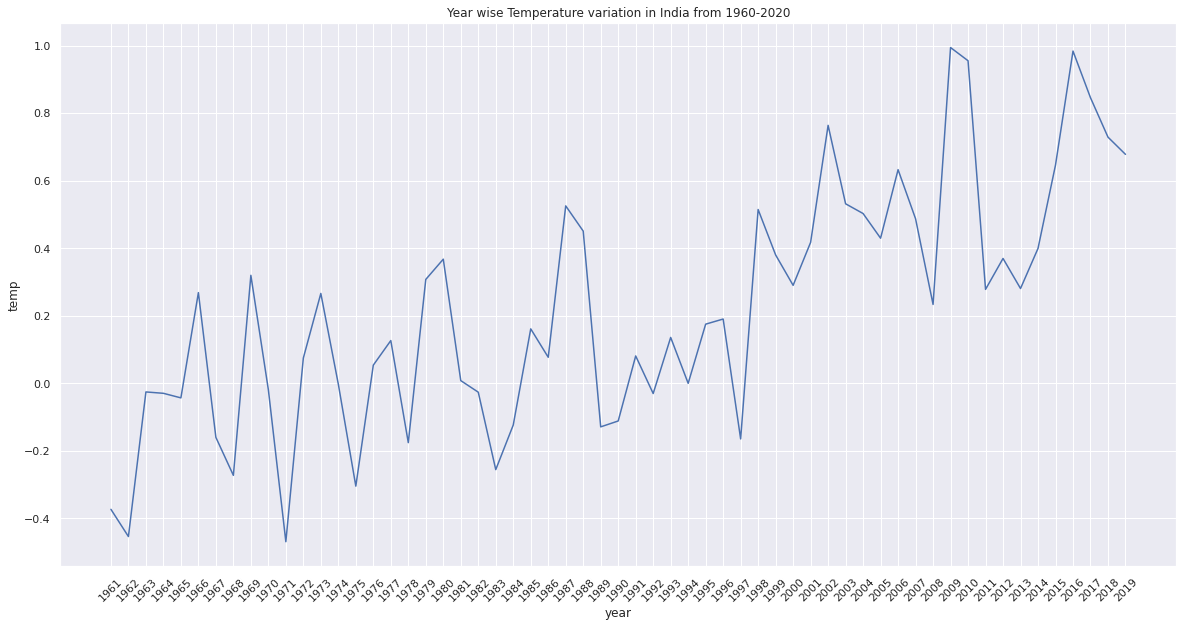

In [ ]:
# Plotting the graphs

# Resetting default parameters
sns.set(rc={'figure.figsize':(20,10)})

avg_temp_india_plot = sns.lineplot(x = avg_india_data['year'], y = avg_india_data['temp'])

# Rotating labels to ensure readability
avg_temp_india_plot.set_xticklabels(labels=avg_india_data['year'], rotation=45)
avg_temp_india_plot.set(title = "Year wise Temperature variation in India from 1960-2020")
plt.show()

###This plot shows a rising curve trend for India in its temperature variations over 60 years. To understand this trend better, we check the variations over decades instead of individual years.

In [ ]:
# Trends through Decades

# Creating a third column for 10 year mean
avg_india_data['10year_rolling_avg'] = avg_india_data.temp.rolling(10).mean()

avg_india_data.head(11)

,temp,year,10year_rolling_avg
1961,-0.373353,1961,NaN
1962,-0.453941,1962,NaN
1963,-0.025765,1963,NaN
1964,-0.029824,1964,NaN
1965,-0.043353,1965,NaN
1966,0.268353,1966,NaN
1967,-0.160235,1967,NaN
1968,-0.272765,1968,NaN
1969,0.319588,1969,NaN
1970,-0.019176,1970,-0.079047


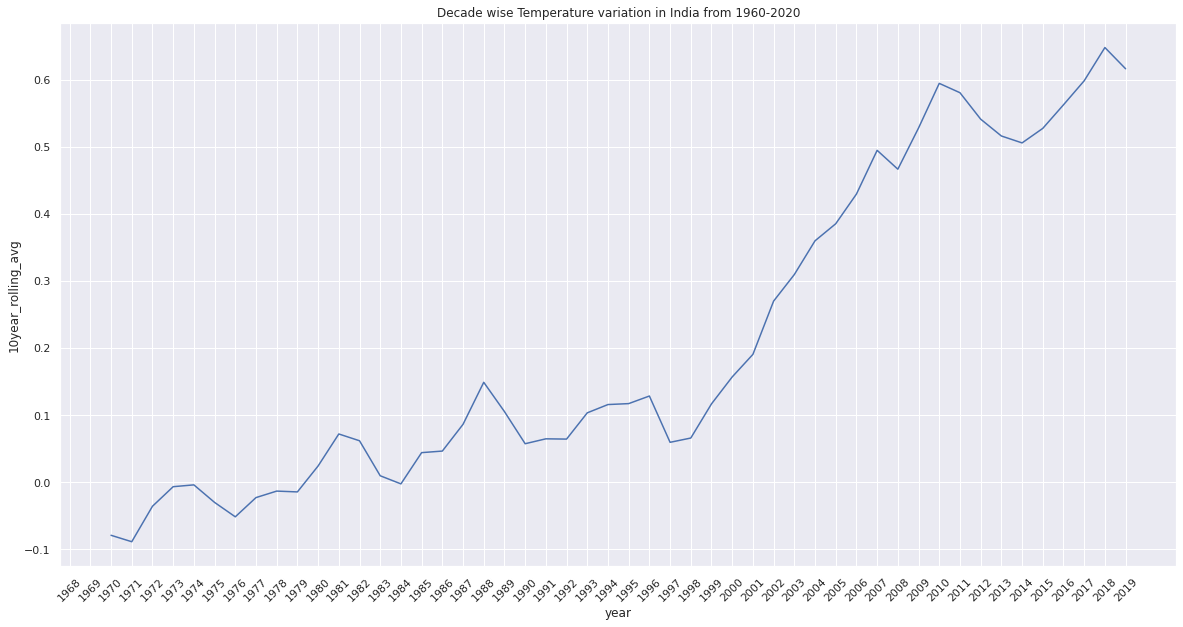

In [ ]:
# Plotting the 10 year rolling average graph

sns.set(rc={'figure.figsize':(20,10)})
rolling_plot = sns.lineplot(x = avg_india_data['year'], y = avg_india_data['10year_rolling_avg'])
rolling_plot.set_xticklabels(labels=avg_india_data['year'], rotation=45)
rolling_plot.set(title = "Decade wise Temperature variation in India from 1960-2020")
plt.show()

#### This plot shows a rising curve much smoother than individual years, showing a gentle slope before 1998, and a sharp rise post 2000s.

#### We will justify these slopes by checking for maximum and minimum variations in temperature over the years.

In [ ]:
# Using the meterological year data to find Maximum and Minimum variations

# Create new dataset of specific data
meteorological_year = india_data[india_data['months'] == 'Meteorological year']
meteorological_year

,months,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1767,Meteorological year,-0.23,-0.531,-0.064,0.002,-0.06,0.29,-0.214,-0.243,0.3,0.034,-0.483,0.014,0.342,0.014,-0.317,-0.023,0.142,-0.165,0.281,0.384,0.04,-0.067,-0.206,-0.167,0.137,0.12,0.509,0.436,-0.083,-0.146,0.114,-0.045,0.134,0.009,0.133,0.233,-0.169,0.493,0.381,0.274,0.398,0.735,0.583,0.475,0.479,0.578,0.513,0.167,1.035,1.017,0.235,0.364,0.307,0.419,0.576,0.977,0.866,0.769,0.685


In [ ]:
# Remove redundant column, and convert rows to columns
meteorological_year = meteorological_year.drop('months', axis = 1).transpose()
meteorological_year.head()

,1767
1961,-0.230
1962,-0.531
1963,-0.064
1964,0.002
1965,-0.060


In [ ]:
# Rename using column operations
meteorological_year = meteorological_year.rename({1767: 'Variation'}, axis=1)
meteorological_year.head()

,Variation
1961,-0.230
1962,-0.531
1963,-0.064
1964,0.002
1965,-0.060


In [ ]:
# Finding maximum and minimum values

highest_10_india = meteorological_year.nlargest(10, ['Variation'])
lowest_10_india = meteorological_year.nsmallest(10, ['Variation'])
lowest_10_india = lowest_10_india.loc[::-1]

# Join highest and lowest variation dataframes
highest_lowest_india = pd.concat([highest_10_india, lowest_10_india], axis=0)   #axis=0 concatenates it row wise
highest_lowest_india

,Variation
2009,1.035
2010,1.017
2016,0.977
2017,0.866
2018,0.769
2002,0.735
2019,0.685
2003,0.583
2006,0.578
2015,0.576


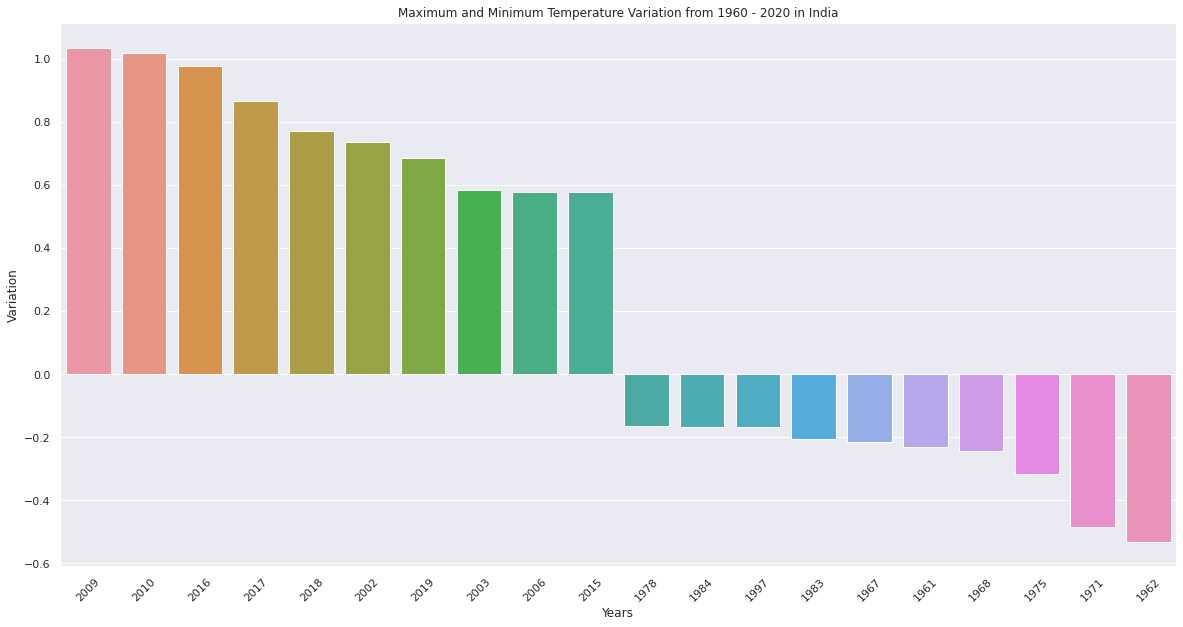

In [ ]:
# Plotting a bar graph for Maximum and Minimum Variations

highest_lowest_plot = sns.barplot(y = highest_lowest_india['Variation'], x = highest_lowest_india.index)
highest_lowest_plot.set_xticklabels(labels=highest_lowest_india.index, rotation=45)
highest_lowest_plot.set_xlabel("Years")
highest_lowest_plot.set(title = 'Maximum and Minimum Temperature Variation from 1960 - 2020 in India')
plt.show()

### This bar graph shows us the highest and lowest variations in temperature, and we can infer that temperature variations have increased drastically in the 21st century, while lowest ones were seen in the decades from 1960-1980.

### This justifies our trend plots with gentle and steep rising curves before and after 2000.

#Predicting World trends in Global Warming

In [ ]:
# Importing Prophet package

from fbprophet import Prophet

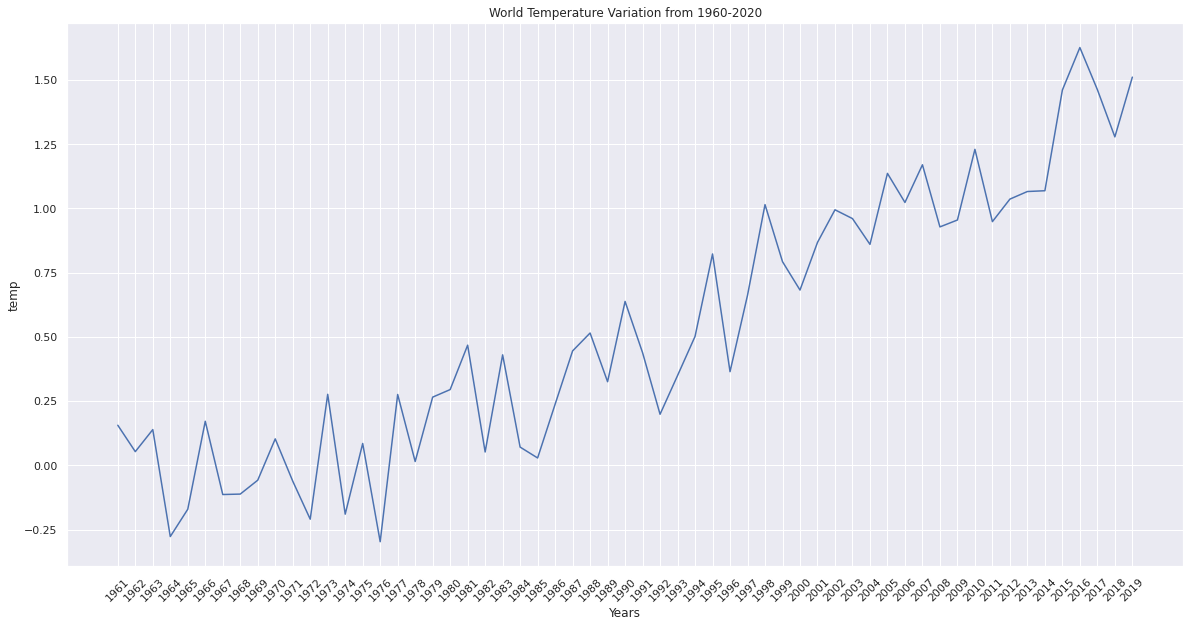

In [ ]:
# Create dataset for the World

world_data = fdata[fdata['country'] == 'World']
world_data = world_data.drop(columns=['country'])

# Calculating mean variation for world from 1961-2019

# Pandas Series of means converted to dataframe
avg_world_data = world_data.mean().to_frame()

# Create a column labeled ds, convert index data to column data
avg_world_data['ds'] = avg_world_data.index

# Rename mean column to temp
avg_world_data = avg_world_data.rename({0: 'temp'}, axis=1)

# Plotting the graph for this data

# Resetting graph parameters
sns.set(rc={'figure.figsize':(20,10)})
avg_worldtemp_plot = sns.lineplot(x = avg_world_data['ds'], y = avg_world_data['temp'])
avg_worldtemp_plot.set_xticklabels(labels=avg_world_data['ds'], rotation=45)
avg_worldtemp_plot.set_xlabel("Years")
avg_worldtemp_plot.set(title = 'World Temperature Variation from 1960-2020')
plt.show()

##### This plot shows that the World temperature trends also see a rising curve pattern. This will be our expectation from the prediction model.


In [ ]:
#Renaming columns for the prediction for the Prophet specific model
avg_world_data["y"] = avg_world_data["temp"]
avg_world_data = avg_world_data.drop(columns=["temp"])
avg_world_data.head()


,ds,y
1961,1961,0.155941
1962,1962,0.053235
1963,1963,0.139000
1964,1964,-0.277353
1965,1965,-0.170941


In [ ]:
# Creating a dataframe of the years for prediction
future_df = pd.DataFrame(np.arange(2020, 2060), columns=['ds'])
future_df.tail()


,ds
35,2055
36,2056
37,2057
38,2058
39,2059


In [ ]:
# Creating the prediction model

out_model = Prophet()                                                     #Creating a Prophet object and fitting the exist world dataframe to create a time series analysis model
out_model.fit(avg_world_data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Predicting the variations

out_forecast = out_model.predict(future_df).loc[:, ['ds', 'yhat']]
out_forecast['ds'] = out_forecast['ds'].apply(lambda x: x.year)                 #Keeps the year, instead of entire dates unnecessary for our analysis
out_forecast.head()

,ds,yhat
0,2020,1.285950
1,2021,1.424583
2,2022,1.441519
3,2023,1.432236
4,2024,1.396775


In [ ]:
#Concatenating previous and predicted data

out_forecast = out_forecast.rename({'yhat': 'y'}, axis=1)
out_result_df = pd.concat([avg_world_data, out_forecast], axis=0)
out_result_df["ds"] = out_result_df["ds"].apply(pd.to_numeric)
out_result_df.tail()

,ds,y
35,2055,2.318836
36,2056,2.283375
37,2057,2.422008
38,2058,2.438944
39,2059,2.429661


In [ ]:
#Ensuring numeric datatype of the data before plotting

out_result_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 1961 to 39
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      99 non-null     int64  
 1   y       99 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 2.3+ KB


#Plotting predicted World trends

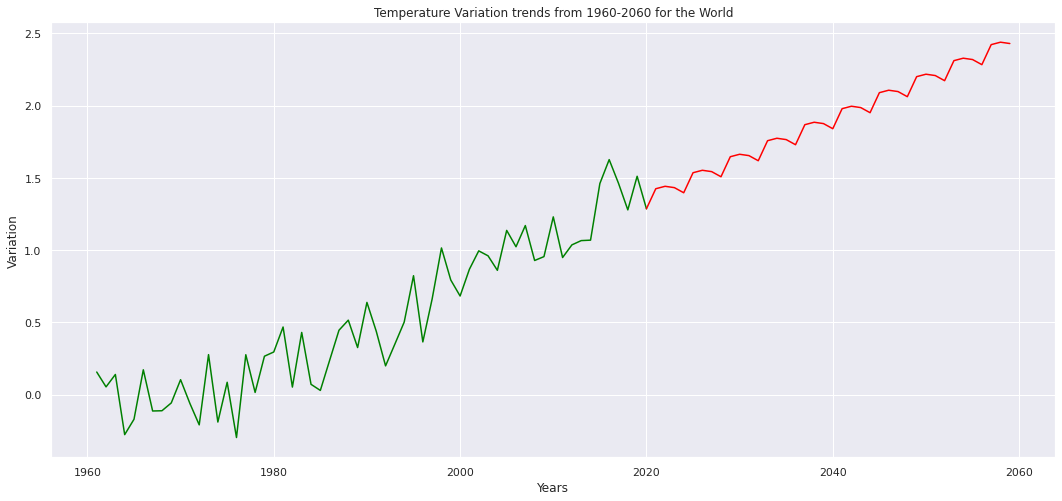

In [ ]:
#Plotting the final prediction graph for the world

sns.set(rc={'figure.figsize':(18,8)})

existing_world_data = out_result_df.iloc[:60, :]
predicted_world_data = out_result_df.iloc[59:, :]

plt.plot(existing_world_data['ds'], existing_world_data['y'], color='green')
plt.plot(predicted_world_data['ds'], predicted_world_data['y'], color='red')
plt.xlabel('Years')
plt.ylabel('Variation')
plt.title('Temperature Variation trends from 1960-2060 for the World')

plt.show()

#### **Thus, the predicted values follow the rising trend that had been visible through the data from 1960 to 2020.**

#### Furthermore, this variation rises steeply into higher variations beyond an acceptable, average temperature as the years progress, which is hazardous towards human life, climate and the earth as we know it.

#### This analysis shows that the current trends in human activity, industrialization and pollution are unsuitable for a sustainable and safe future, and efforts must be made to curb these unchecked activities.


# Comparing Predictions for India and the World


In [ ]:
# Recreating a similar model for India

avg_india_data_p = avg_india_data
avg_india_data_p = avg_india_data.drop('10year_rolling_avg', axis=1)
avg_india_data_p = avg_india_data_p.rename({'temp':'y', 'year':'ds'},axis=1)
list=['ds','y']
avg_india_data_p = avg_india_data_p.filter(list)

future_india_df = pd.DataFrame(np.arange(2020, 2060), columns=['ds'])

out_model_india = Prophet()                                                     #Creating a Prophet object and fitting the exist world dataframe to create a time series analysis model
out_model_india.fit(avg_india_data_p)

out_forecast_india = out_model_india.predict(future_df).loc[:, ['ds', 'yhat']]
out_forecast_india['ds'] = out_forecast_india['ds'].apply(lambda x: x.year)     #Keeps the year, instead of entire dates unnecessary for our analysis

out_forecast_india = out_forecast_india.rename({'yhat': 'y'}, axis=1)
out_result_india_df = pd.concat([avg_india_data_p, out_forecast_india], axis=0)
out_result_india_df["ds"] = out_result_india_df["ds"].apply(pd.to_numeric)
out_result_india_df.head()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,y
1961,1961,-0.373353
1962,1962,-0.453941
1963,1963,-0.025765
1964,1964,-0.029824
1965,1965,-0.043353


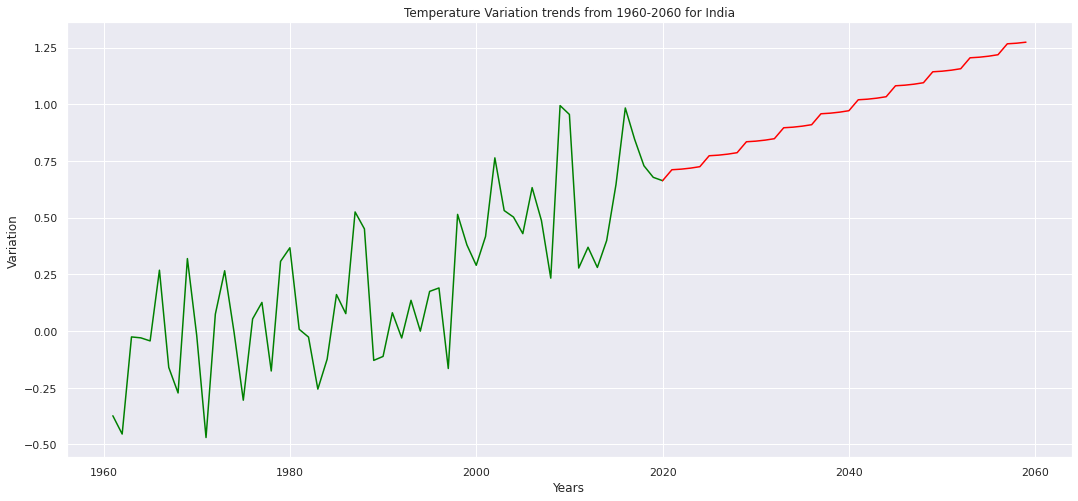

In [ ]:
# Plotting the final plot for India


sns.set(rc={'figure.figsize':(18,8)})

existing_india_data = out_result_india_df.iloc[:60, :]
predicted_india_data = out_result_india_df.iloc[59:, :]

plt.plot(existing_india_data['ds'], existing_india_data['y'], color='green')
plt.plot(predicted_india_data['ds'], predicted_india_data['y'], color='red')
plt.xlabel('Years')
plt.ylabel('Variation')
plt.title('Temperature Variation trends from 1960-2060 for India')

plt.show()

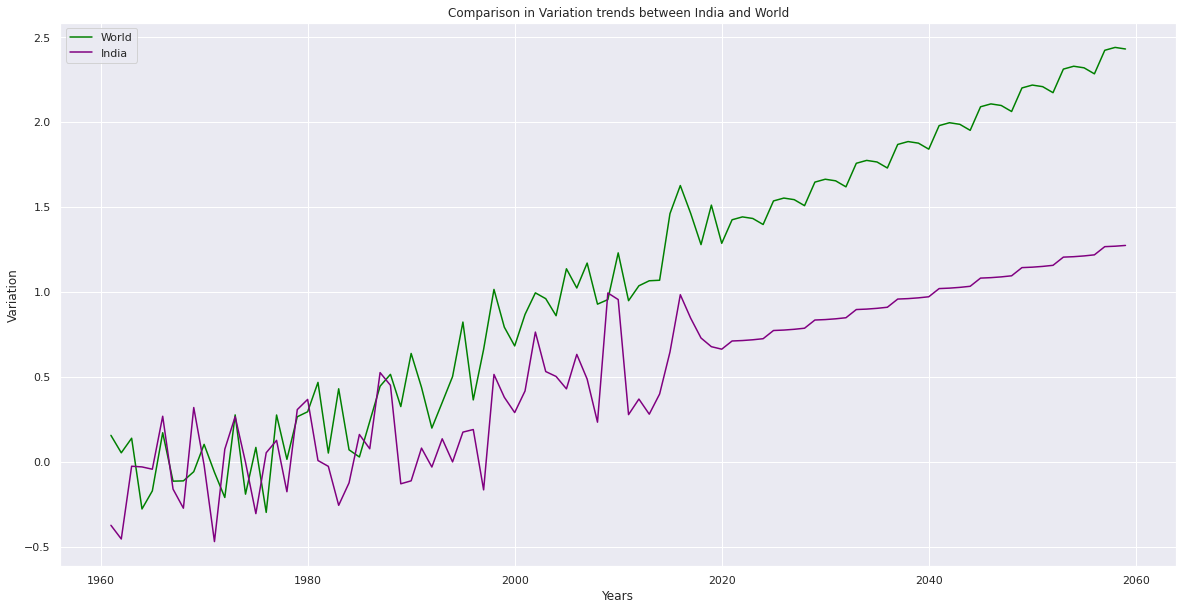

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
plot = sns.lineplot(x = out_result_df['ds'], y = out_result_df['y'], color = 'green')
plot = sns.lineplot(x = out_result_india_df['ds'], y = out_result_india_df['y'], color ='purple')
plot.legend(labels = ['World','India'])
plot.set(xlabel='Years', ylabel='Variation', title = 'Comparison in Variation trends between India and World')
plt.show()

#**Conclusion:**

### This analysis and prediction model helped us visualize 6 decades of exensive temperature change data, and predicted a long term increase in variation of up to 2.5 degrees Celsius till the year 2060.
